### Importing the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Defining the function to convert the Google Sheet URL to csv


In [2]:
import re
def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'
    new_url = re.sub(pattern, replacement, url)
    return new_url

### Loading the data from the Google Sheet


In [3]:
url = convert_google_sheet_url('https://docs.google.com/spreadsheets/d/1PF1PQ4-qg4ySrtyOXiF6SFGX7P0Qfl_r/edit?gid=1443108996#gid=1443108996')
data = pd.read_csv(url)

In [29]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year,Total Cost,Month,Altitude_Numeric
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,Unknown bird - medium,N,"30,736","1,500",0,Yes,2000.0,NaN,11.0,1500.0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,Rock pigeon,Y,0,0,0,No,2001.0,0.0,7.0,NaN
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,European starling,N,0,50,0,No,2001.0,0.0,9.0,NaN
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,European starling,Y,0,50,0,Yes,2002.0,0.0,9.0,NaN
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,European starling,N,0,50,0,No,2003.0,0.0,6.0,NaN


### Descriptive Analysis


In [7]:
print(data.shape)
print(data.info())

(25558, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291

In [8]:
print(data.isnull().sum())

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [9]:
print(data.describe())

           Record ID  Wildlife: Number Struck Actual  Number of people injured
count   25558.000000                    25558.000000              25558.000000
mean   253916.085609                        2.691525                  0.001056
std     38510.453382                       12.793975                  0.050420
min      1195.000000                        1.000000                  0.000000
25%    225783.750000                        1.000000                  0.000000
50%    248749.000000                        1.000000                  0.000000
75%    269168.750000                        1.000000                  0.000000
max    321909.000000                      942.000000                  6.000000


In [10]:
print(data.columns)

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')


## Yearly Analysis of Bird Strikes in the US


C:\Users\Ashwin V\AppData\Local\Temp\ipykernel_72972\1833504989.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Year'] = pd.to_datetime(data['FlightDate']).dt.year


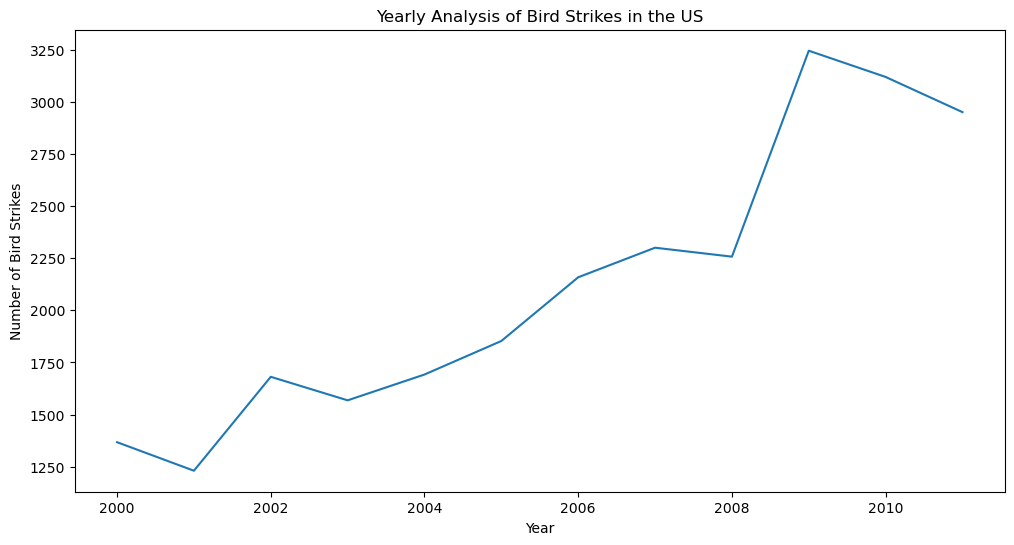

In [13]:
data['Year'] = pd.to_datetime(data['FlightDate']).dt.year
yearly_strikes = data['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_strikes.index, y=yearly_strikes.values)
plt.title('Yearly Analysis of Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()

## Top 10 US Airlines with Most Bird Strikes


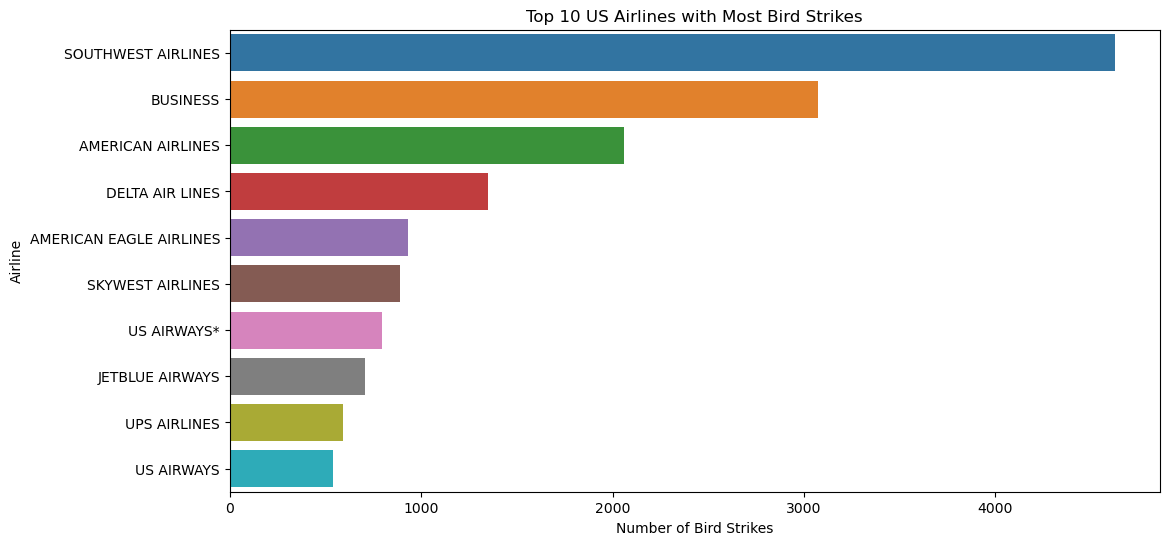

In [14]:
top_10_airlines = data['Aircraft: Airline/Operator'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_airlines.values, y=top_10_airlines.index)
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.show()

## Top 50 Airports with Most Bird Strike Incidents


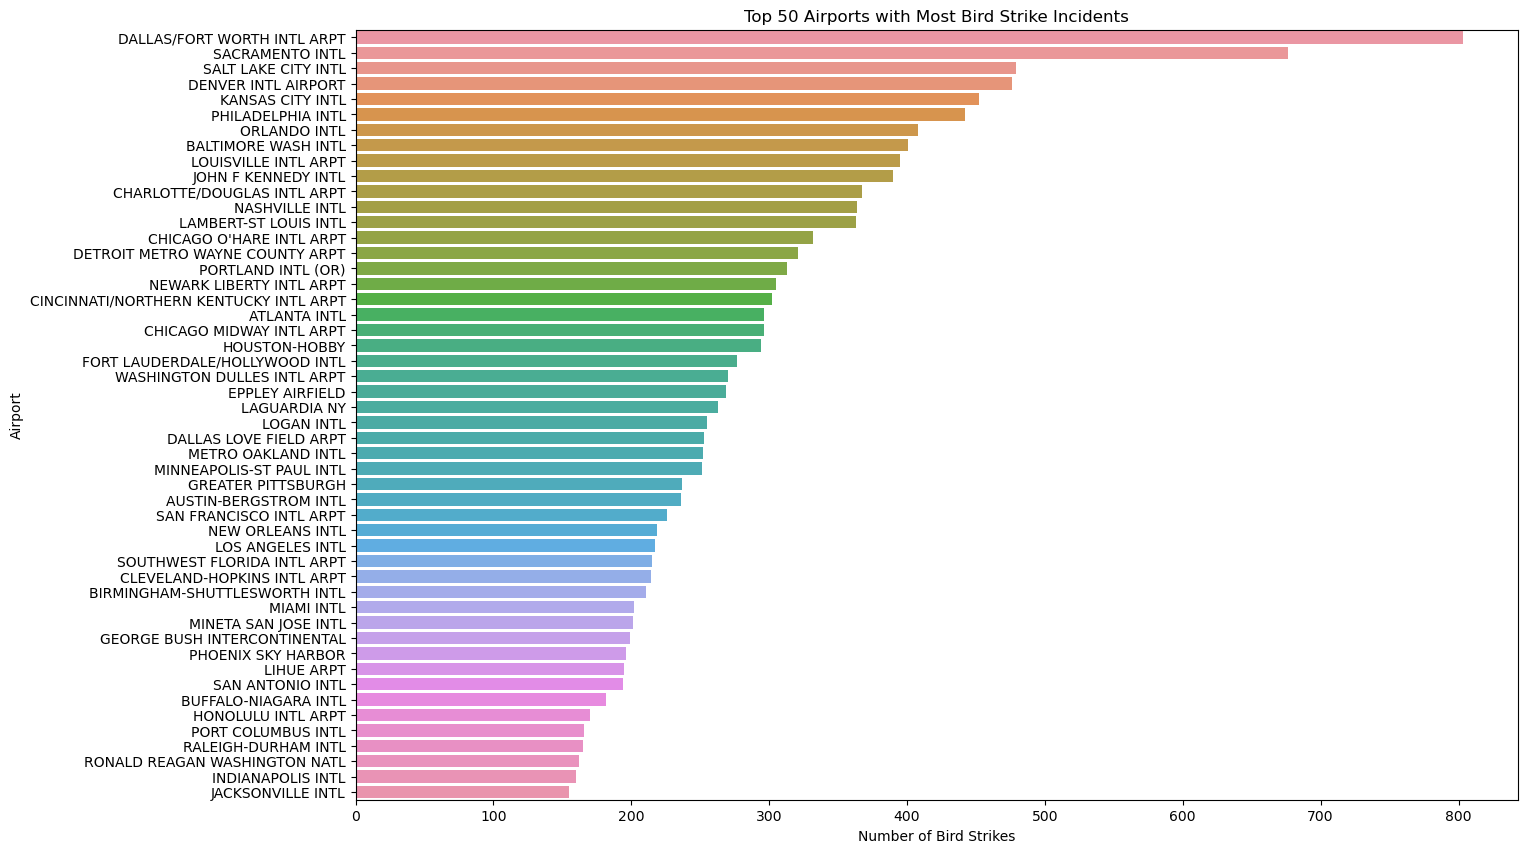

In [15]:
top_50_airports = data['Airport: Name'].value_counts().nlargest(50)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_50_airports.values, y=top_50_airports.index)
plt.title('Top 50 Airports with Most Bird Strike Incidents')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.show()

## Yearly Cost Incurred due to Bird Strikes


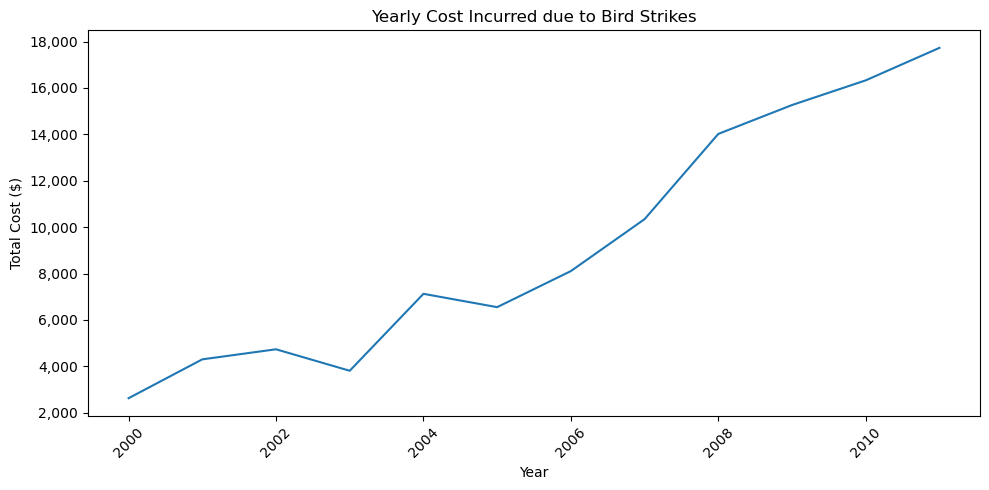

Number of rows with valid cost data: 24721
Total cost range: 0.0 to 984.0
Years with cost data: [2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0]


In [19]:
plt.figure(figsize=(10, 5))
data['Total Cost'] = pd.to_numeric(data['Cost: Total $'], errors='coerce')
yearly_cost = data.groupby('Year')['Total Cost'].sum().dropna()
if not yearly_cost.empty:
    sns.lineplot(x=yearly_cost.index, y=yearly_cost.values)
    plt.title('Yearly Cost Incurred due to Bird Strikes')
    plt.xlabel('Year')
    plt.ylabel('Total Cost ($)')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.tight_layout()
    plt.show()
else:
    print("No valid cost data available for visualization.")
print("Number of rows with valid cost data:", data['Total Cost'].notna().sum())
print("Total cost range:", data['Total Cost'].min(), "to", data['Total Cost'].max())
print("Years with cost data:", yearly_cost.index.tolist())

## Bird Strikes by Month


C:\Users\Ashwin V\AppData\Local\Temp\ipykernel_72972\3646809029.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Month'] = pd.to_datetime(data['FlightDate']).dt.month


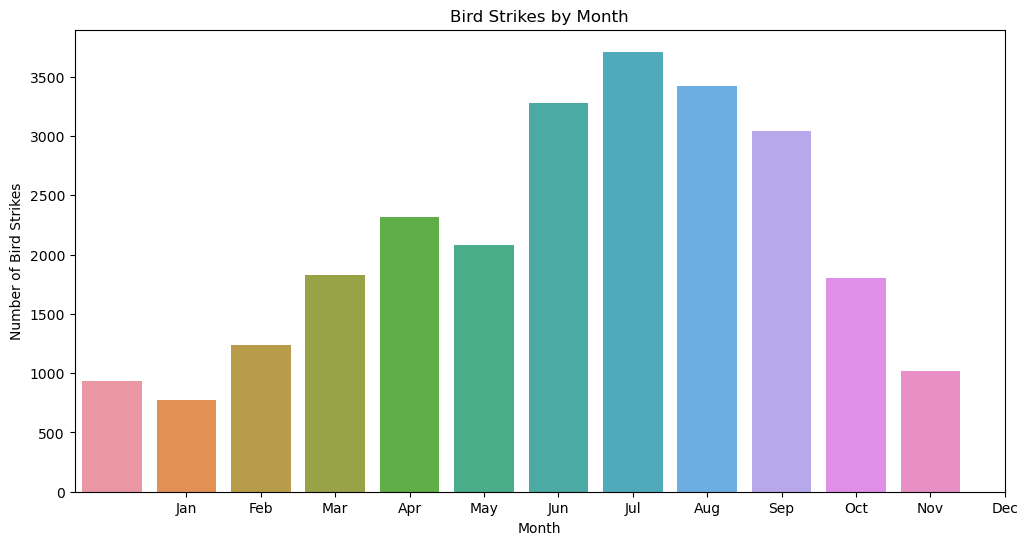

In [21]:
data['Month'] = pd.to_datetime(data['FlightDate']).dt.month
monthly_strikes = data['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_strikes.index, y=monthly_strikes.values)
plt.title('Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### July has the highest number of bird strikes


## Altitude of Aeroplanes at the Time of Strike


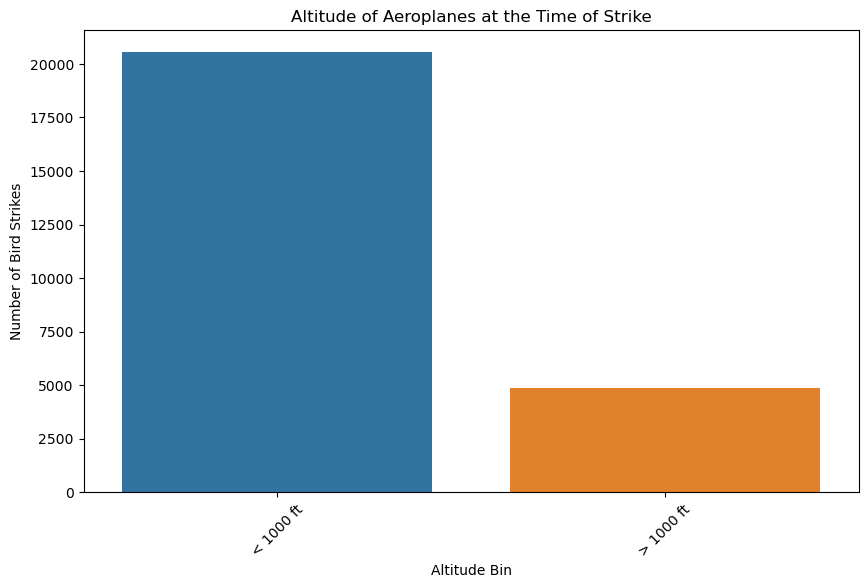

In [22]:
altitude_counts = data['Altitude bin'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=altitude_counts.index, y=altitude_counts.values)
plt.title('Altitude of Aeroplanes at the Time of Strike')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

## Phase of Flight at the Time of Strike


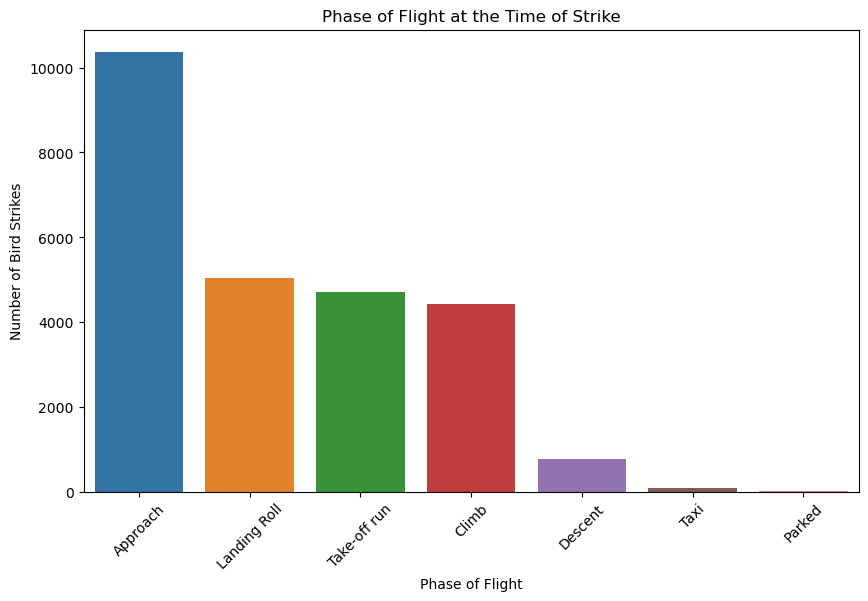

In [23]:
phase_counts = data['When: Phase of flight'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_counts.index, y=phase_counts.values)
plt.title('Phase of Flight at the Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

## Effect of Bird Strikes & Impact on Flight


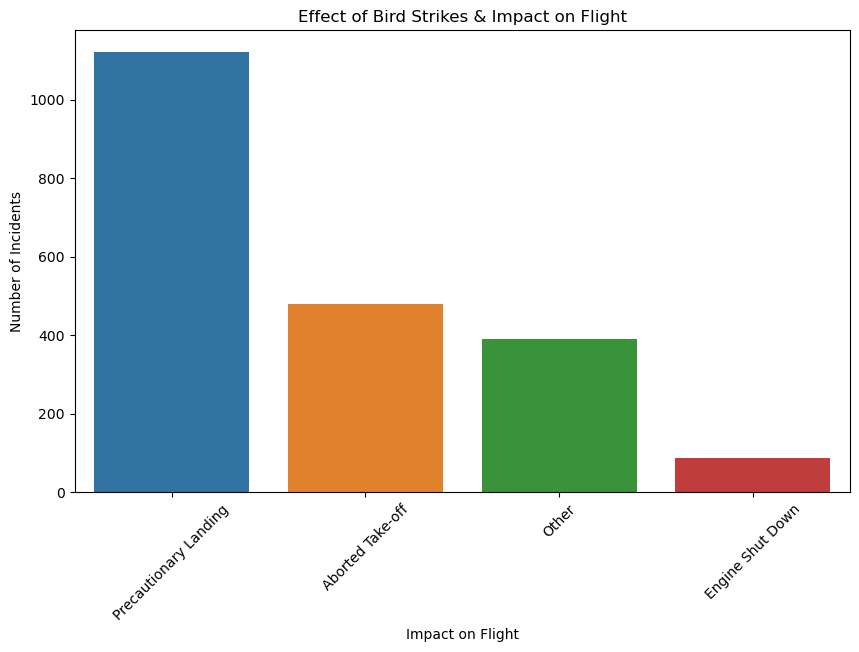

In [24]:
effect_counts = data['Effect: Impact to flight'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=effect_counts.index, y=effect_counts.values)
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Impact on Flight')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

## Prior Warning and Effect of Strike Relation


<Figure size 1000x600 with 0 Axes>

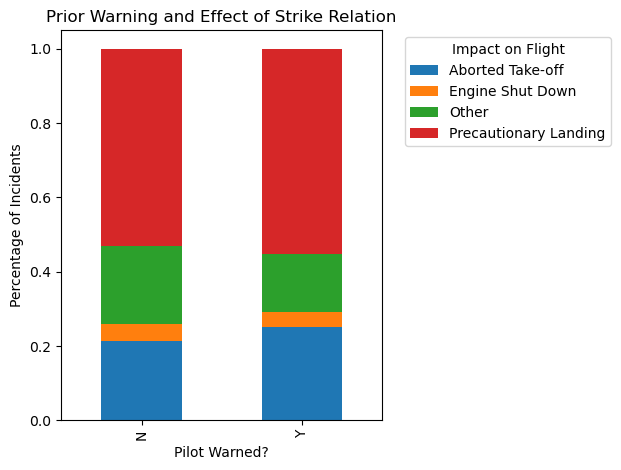

In [25]:
warning_effect = data.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().unstack()
warning_effect_pct = warning_effect.div(warning_effect.sum(axis=1), axis=0)
plt.figure(figsize=(10, 6))
warning_effect_pct.plot(kind='bar', stacked=True)
plt.title('Prior Warning and Effect of Strike Relation')
plt.xlabel('Pilot Warned?')
plt.ylabel('Percentage of Incidents')
plt.legend(title='Impact on Flight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()